In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
#to avoid enconding error, use 'unicode_escape'

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
# check for missing values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.shape

(11251, 13)

In [9]:
# drop null values
df.dropna(inplace = True)

In [10]:
df.shape

(11239, 13)

In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
# change datatype
df['Amount'] = df['Amount'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [15]:
df['Amount'].dtypes

dtype('int32')

In [16]:
# describe() method returns description of the data in the DataFrame(i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [20]:
df['Gender'].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

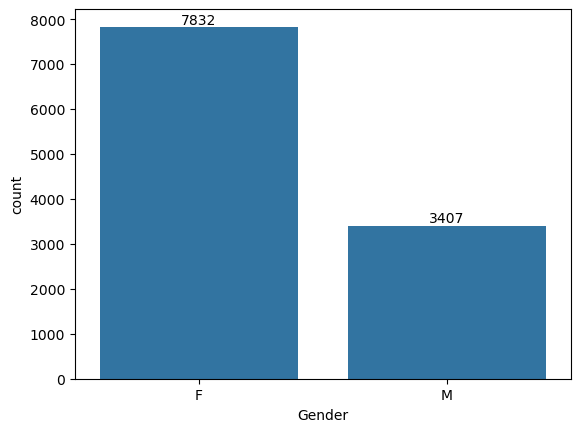

In [19]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [21]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


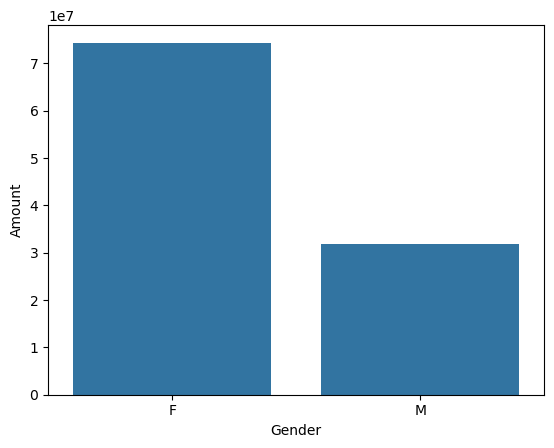

In [22]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

plt.show()

In [ ]:
# From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater tha male

## Age

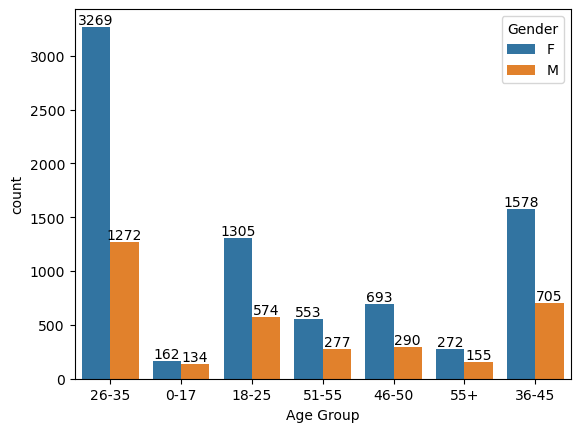

In [23]:
ax = sns.countplot(x = 'Age Group', data = df, hue ='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [66]:
df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


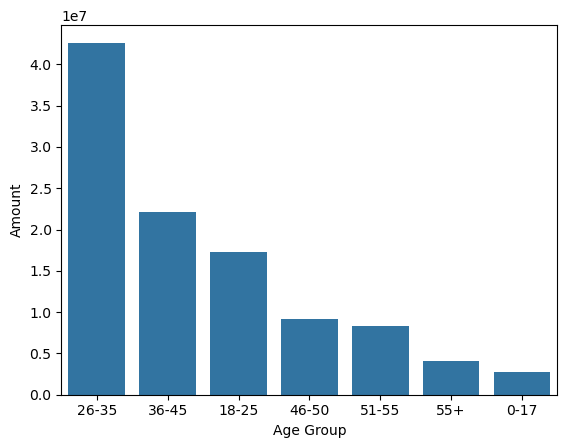

In [24]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

plt.show()

In [ ]:
# From above graphs we can see that most of the buyers are of age group between 26-35yrs females

## State

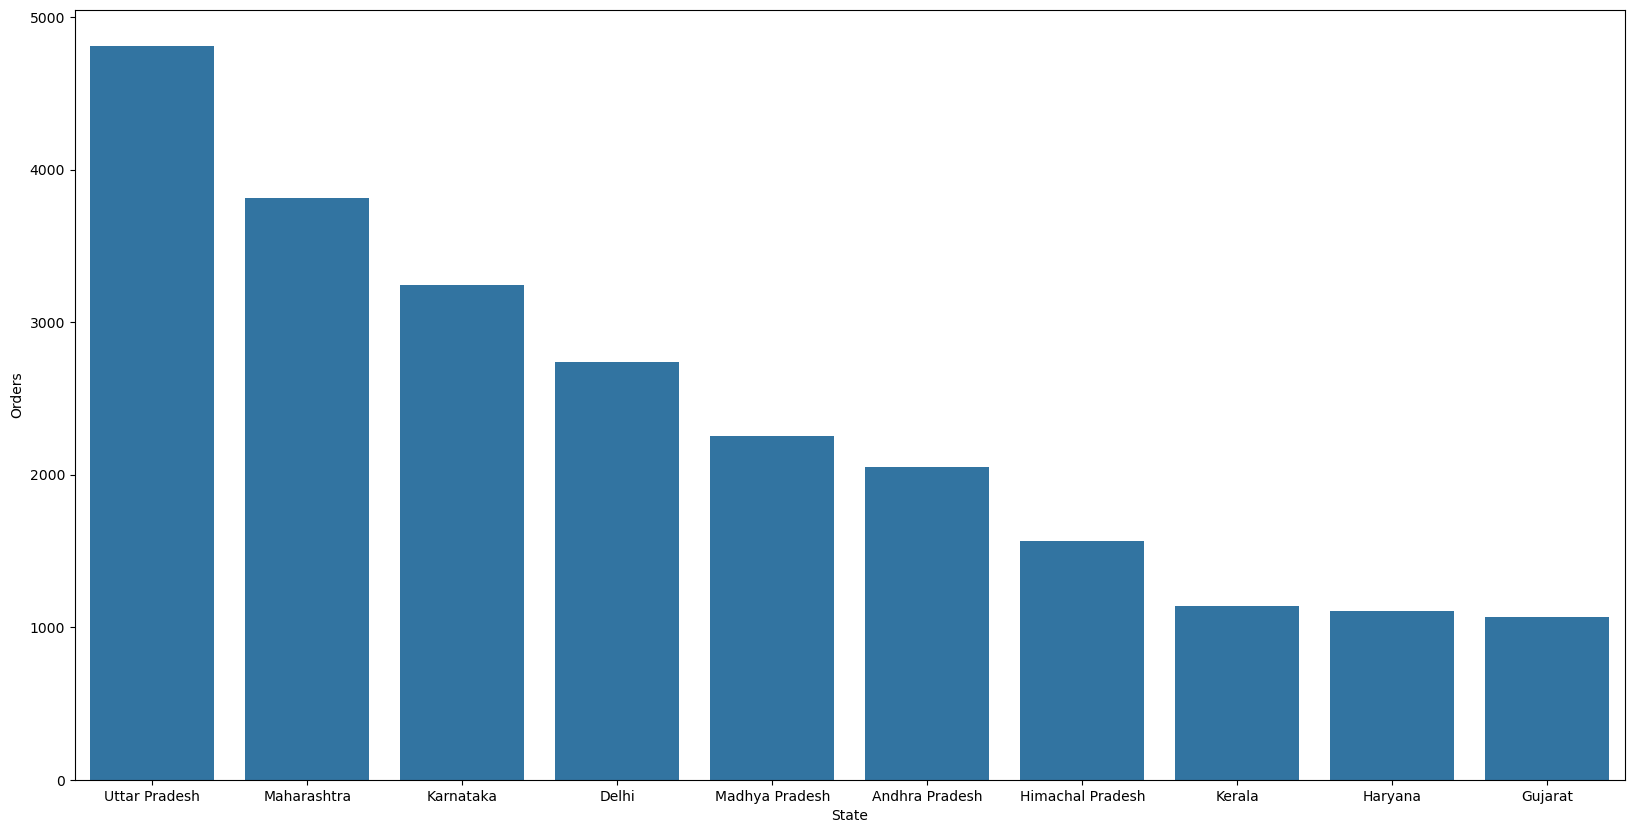

In [26]:
# Total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

plt.figure(figsize = (20, 10))

sns.barplot(x = 'State', y = 'Orders', data = sales_state)

plt.show()

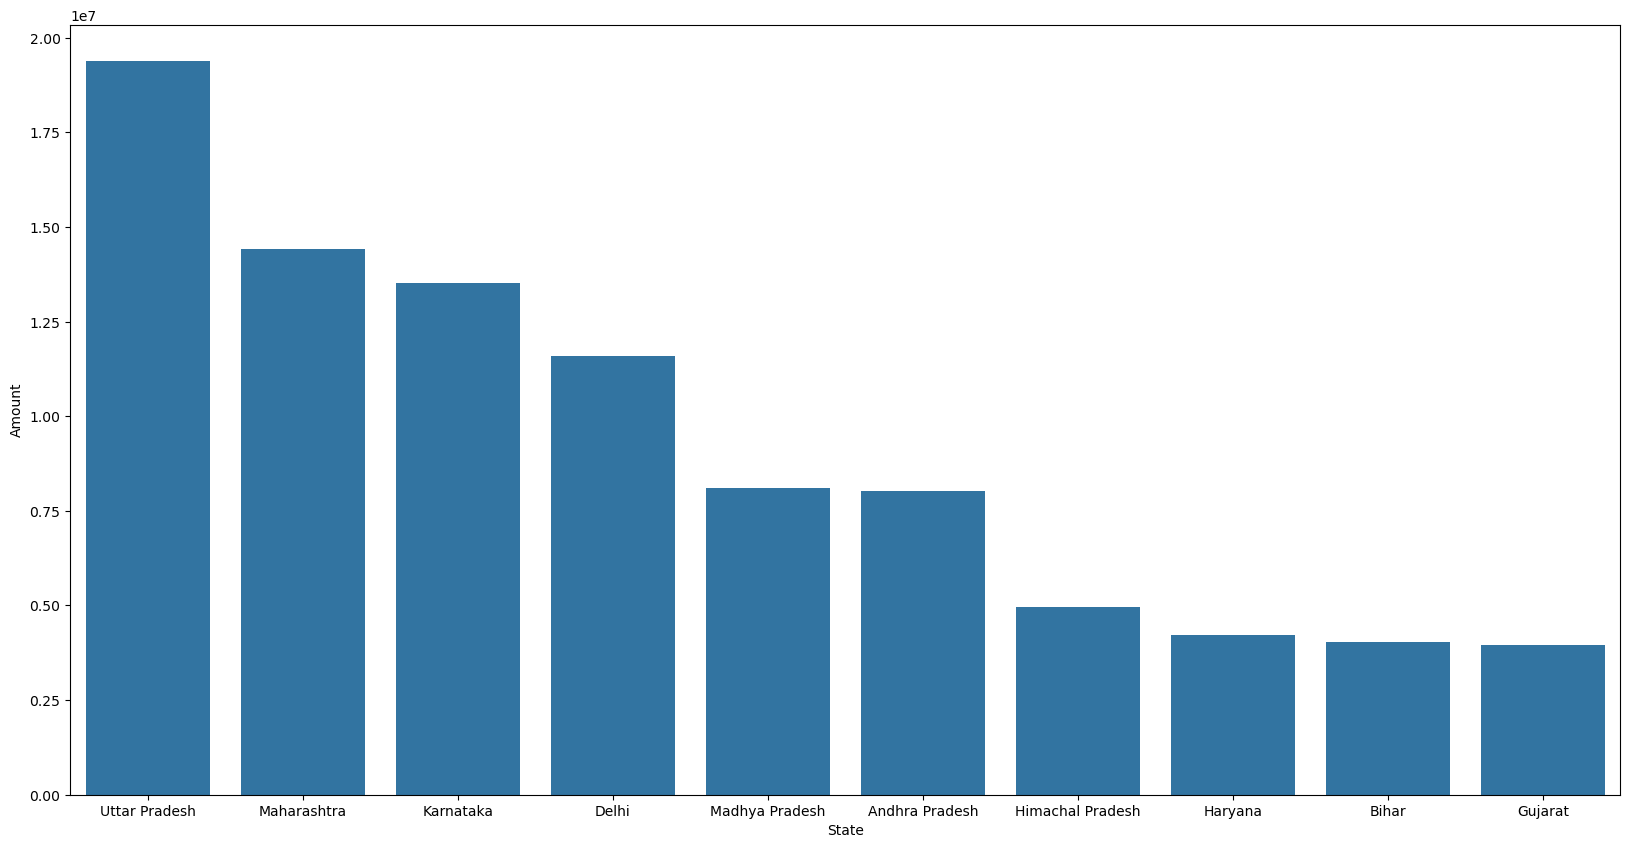

In [27]:
# Total number of Amount from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (20, 10))

sns.barplot(x = 'State', y = 'Amount', data = sales_state)

plt.show()

In [ ]:
# From above graphs we can see that most of the orders & total sales/amount are from U.P, MH, KA respectively but total 

## Marital Status

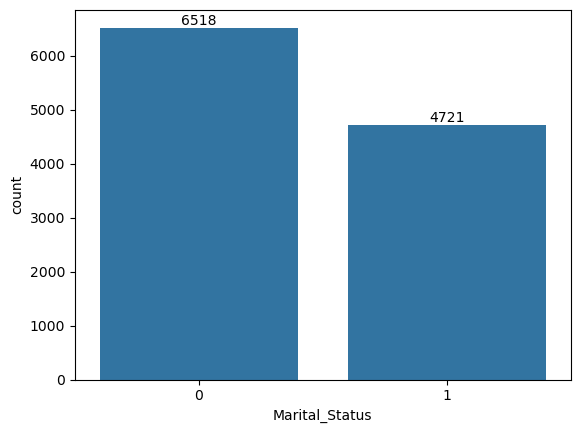

In [28]:
ax = sns.countplot(x = 'Marital_Status', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

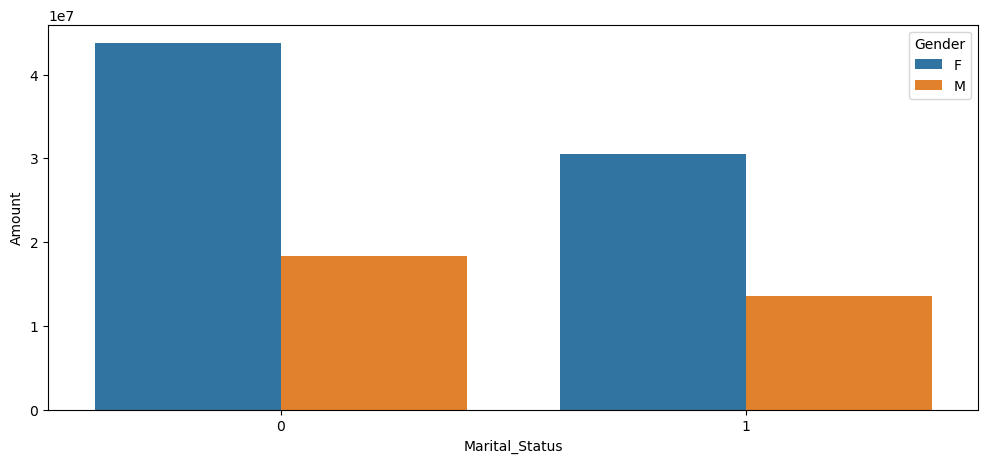

In [37]:
sales_mar = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (12, 5))

sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_mar, hue = 'Gender')

plt.show()

In [ ]:
# From above graphs we can see that most of the buyers are married(women) and they have high purchasing power

## Occupation

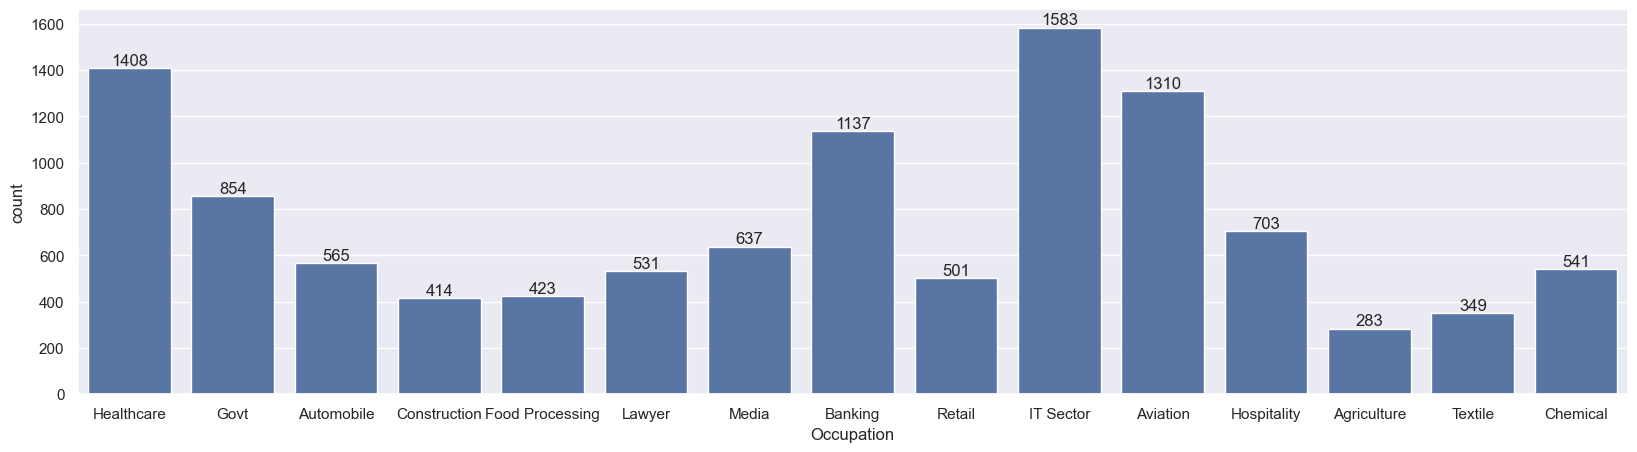

In [48]:
ax = sns.countplot(x = 'Occupation', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize' : (10,5)})

plt.show()

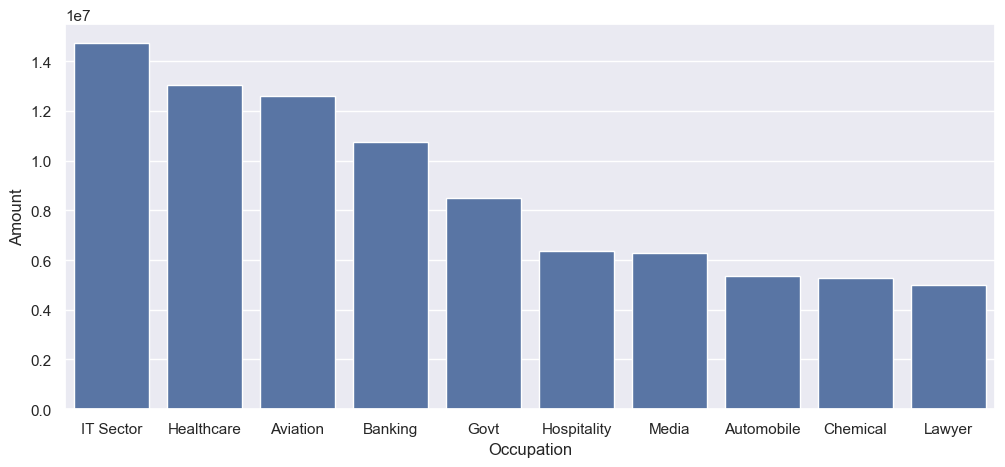

In [49]:
sales_occu = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (12, 5))

sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occu)

plt.show()

In [ ]:
# From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

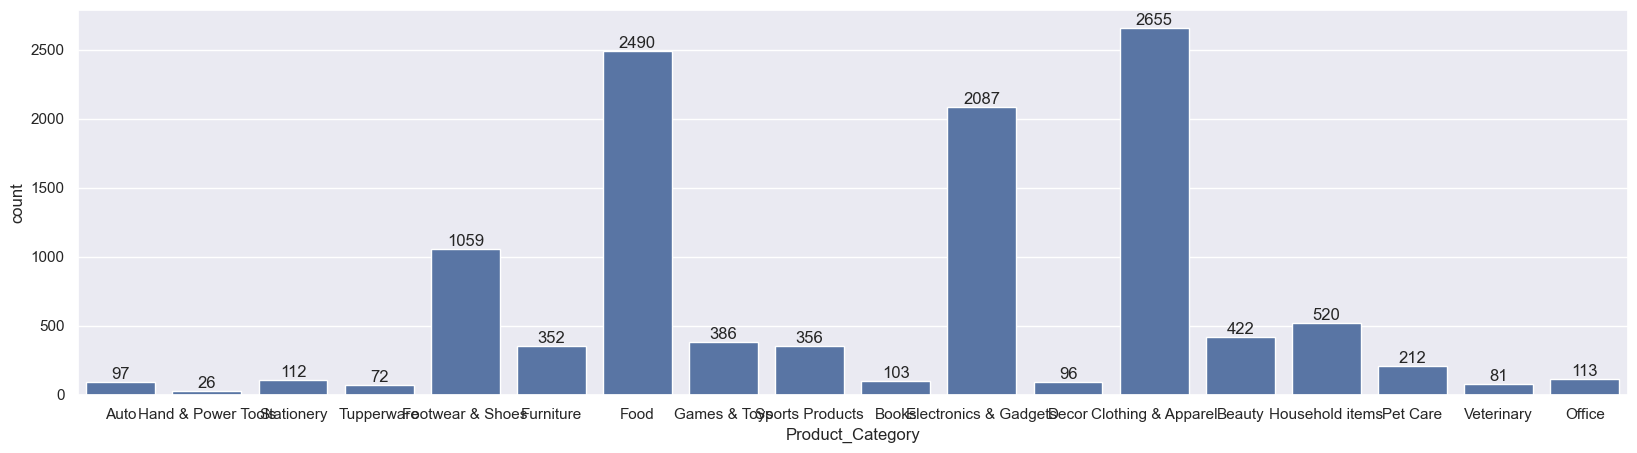

In [52]:
ax = sns.countplot(x = 'Product_Category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize' : (20,10)})

plt.show()

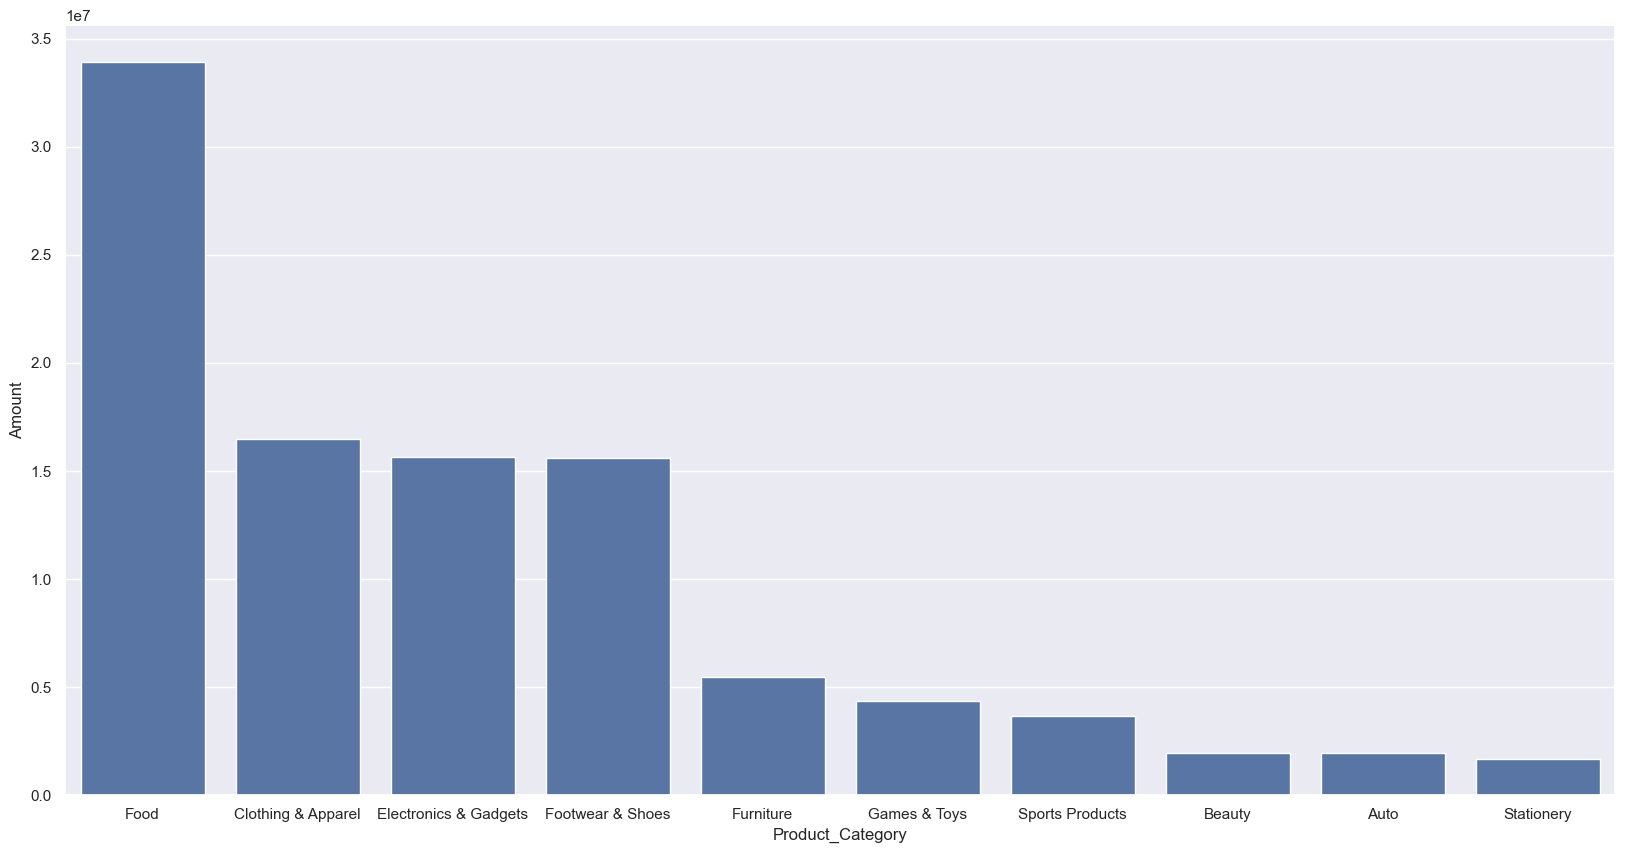

In [53]:
sales_prod = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (20, 10))

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_prod)

plt.show()

In [ ]:
# From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Figure size 2000x1000 with 0 Axes>

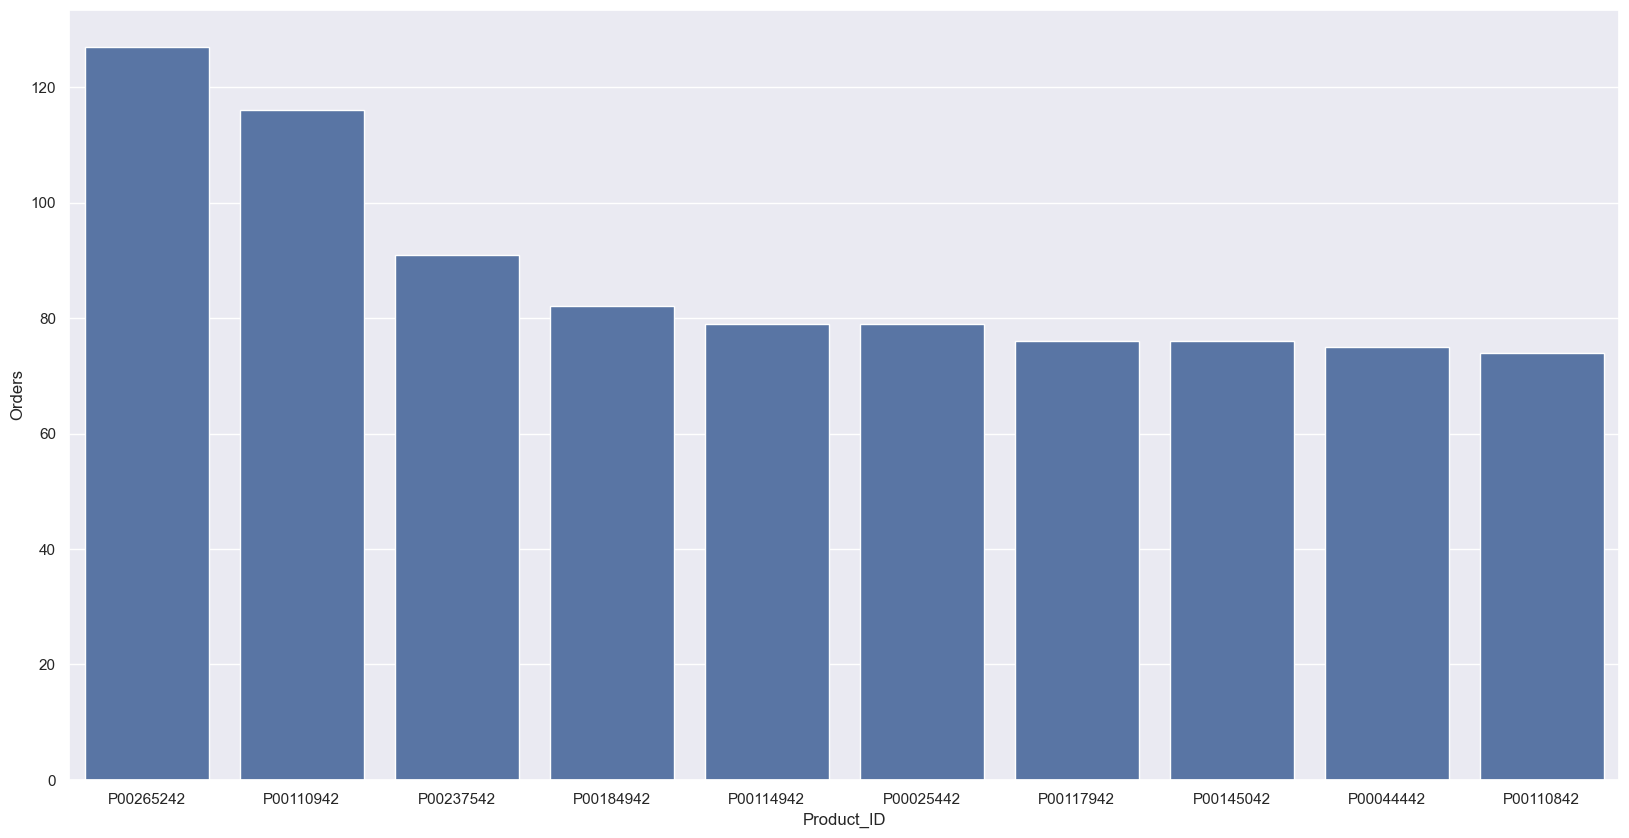

In [55]:
# Top 10 most sold products
sales_PId = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

plt.figure(figsize = (20, 10))

sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_PId)

plt.show()

## Conclusion:

### "Married women age group 26-35yrs from UP, MH, KA working in IT, Healthcare, Aviation are more likely buy products from Food, Clothing and Electronics category"